<a href="https://colab.research.google.com/github/mathucate/kruskal-maze/blob/main/%EB%AF%B8%EB%A1%9C_%EA%B3%BC%EC%A0%9C_%ED%95%B4%EC%84%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# union - find 알고리즘 



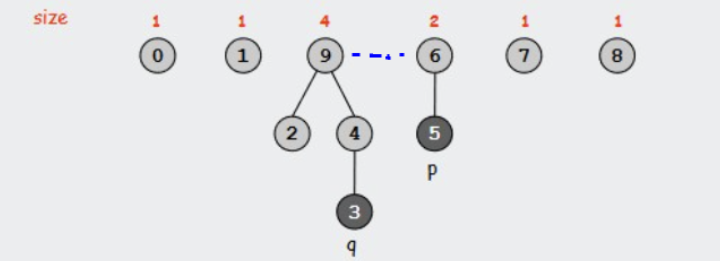

## Forest의 표현방법
Tree(수형도)는 cycle이 없는 연결 단순 그래프이다. 위와 같이 Non-connected인 tree component 들의 묶음을 Forest라 하면 적절한 표현일 것이다. 이와 같은 Forest를 컴퓨터가 다룰 수 있도록 어떻게 표현할 수 있을까?

Forest의 연결상태를 하나의 배열로 나타낼 수 있다. 예를 들어 0~9번까지의 10개의 노드(node 혹은 vertex)가 위와 같이 연결되어 있는 상황을 생각하자. 본래 수형도 자체에는 노드 간의 상하관계나 순서가 없지만 자료구조화시키기 위해서 부모와 자식 노드의 관계를 부여할 필요가 있다. 가장 위에 표시한 노드를 루트(root node)라 하자. 또 연결되어 있는 두 노드에서 위에 있는 노드를 밑의 노드의 부모 노드, 그 반대의 관계를 자식 노드라 하자. 예컨대 3번 노드의 부모는 4번이고, 4번 노드의 부모는 9번이며, 9번의 부모 노드는 없으므로 9번은 루트가 된다. 즉 3번 노드의 루트는 9번이라 할 수 있는 것이다.

이러한 개념을 도입하고 나면 이제 Forest의 상태를 배열 내지는 파이썬에서의 리스트 타입으로 표현하는 것이 가능해진다. 리스트의 n번째(n=0, 1, 2, ...) 위치에 있는 숫자가 n번 노드의 부모를 나타낸다고 정하자. 이때 루트 노드의 경우 부모가 없으므로 그 자신의 번호를 사용하도록 한다.

<i>(함수의 관점으로 보면 배열의 값이 fixed point일 필요충분조건은 해당 번호의 노드가 루트인 것이다.)</i>

이와 같이 규칙을 정하면 위 그림의 Forest는 다음과 같은 배열로 나타내어진다.

```
[0, 1, 9, 4, 9, 6, 6, 7, 8, 9]
```
역으로 이 배열에 대응되는 Forest는 그래프적으로 isomorphic함도 쉽게 추론할 수 있다.
root를 찾는 과정은 반복문 또는 재귀함수를 이용해서 직선 y=x에 대해 Picard's method와 유사한 방식을 적용하는 것으로 구현할 수 있을 것이다.

In [ ]:
parents = [0, 1, 9, 4, 9, 6, 6, 7, 8, 9]

def find_root(D, x):    # D는 임의의 리스트, x는 target index
    p = D[x]
    while p != D[p]:    # fixed point에 도달할 때까지 tree를 거슬러올라감
        p = D[p]
    return p

roots = [find_root(parents, i) for i in range(10)]
print(roots)

[0, 1, 9, 9, 9, 6, 6, 7, 8, 9]


리스트와 노드 번호가 주어지면 루트를 반환하는 함수 find_root를 작성한 것이다.

테스트로 각 노드의 루트의 번호를 나타낸 리스트를 print하여 위 함수의 작동을 확인해보았다.

In [ ]:
def union(D, x, y):
    pa = find_root(D, x)    # x의 루트
    pb = find_root(D, y)    # y의 루트
    if pa != pb:    # 루트가 서로 다른 경우(서로 연결되어 있지 않은 경우)만 union이 가능
        # 번호가 낮은 루트를 번호가 높은 루트의 자식으로 편입시킨다.
        if (pa < pb): D[pa] = pb
        else: D[pb] = pa
              
parents = [0, 1, 9, 4, 9, 6, 6, 7, 8, 9]
print('== union 직전 ==>', parents)
union(parents, 2, 3)
print('2 3 union 직후 =>', parents) # 변화 없음
union(parents, 3, 5)
print('3 5 union 직후 =>', parents)

== union 직전 ==> [0, 1, 9, 4, 9, 6, 6, 7, 8, 9]
2 3 union 직후 => [0, 1, 9, 4, 9, 6, 6, 7, 8, 9]
3 5 union 직후 => [0, 1, 9, 4, 9, 6, 9, 7, 8, 9]


union함수는 현재의 연결상태를 나타내는 리스트 D와 union할 두 노드의 번호 x, y를 받는다. 앞에서 작성한 find_root 함수를 이용해 각각의 루트를 찾는다. 루트끼리 같은 경우는 두 노드가 이미 connected인 것이므로 아무런 변화를 주지 않는다. 루트끼리 다른 경우 번호가 앞선 루트의 부모로 번호가 뒤인(번호의 선후 관계는 큰 의미가 없다) 루트를 지정함으로써 두 union이 구현된다.

예를 들어 2와 3은 이미 연결되어 있으므로 union 함수에 의해 아무런 변화를 받지 않지만, 3과 5는 각각의 루트가 9와 6으로 다르므로 6이 9의 자식으로 편입된 결과를 나타내고 있다.

## Weighted graph의 표현



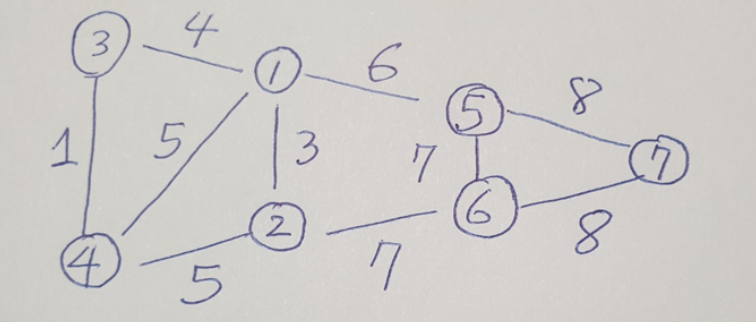

일반적인 단순 연결 그래프에서 각 edge에 길이 혹은 비용으로 해석될 수 있는 weight가 주어진 것을 Weighted graph라 한다. 앞에서와 마찬가지로 적당한 규칙을 부여하면 이러한 Weighted graph도 파이썬의 리스트를 이용해 표현할 수 있다.

한 edge는 양 끝점과 weight값으로 표현할 수 있으므로 [끝점, 끝점, 길이]의 크기가 3인 리스트들로 이루어진 중첩된 리스트를 생각하자. 예를 들어 3번 노드와 4번 노드를 연결하는 변의 weight가 1이므로 이 edge는 [3, 4, 1]로 나타낼 수 있다. 마찬가지 방법으로 나머지 모든 edge들을 표현하여 하나의 리스트로 묶으면 다음과 같은 리스트를 얻는다.
```
[[3, 4, 1], [1, 2, 3], [1, 3, 4], [1, 4, 5], [1, 5, 6], 
 [2, 6, 7], [2, 4, 5], [5, 7, 8], [5, 6, 7], [6, 7, 8]]
```

## 객체 지향 프로그래밍과 클래스
객제 지향 프로그래밍(Object Oriented Programming, OOP)은 기본적으로 프로그램에서 생성하고 변조하는 등의 작업을 가할 대상들을 규격화시키고 대상에 대해 가능한 작업들을 명시적으로 집합시킴으로써 절차 지향의 방식에 비해 코드의 반복을 줄이고 가독성을 높임으로써 디버깅을 수월하게 하도록 하는 등 여러 이점을 얻고자 하는 프로그래밍 패러다임이다. 실질적으로는 python, java 등 여러 언어에서 **클래스**를 정의하고 인스턴스를 만들어 클래스 내부에 정의된 메서드를 호출함으로써 실현된다. 클래스는 객체의 명세를 정의하는 코드 묶음인데 대상의 규격과 행위를 정하는 것으로 이해할 수 있다. 이때 규격이란 클래스의 필드, 행위는 메서드에 해당한다.

예를 들어, Person 이라는 클래스에는 name, age, gender 등의 필드가 있을 것이며, 사람이 행하는 동작 - run(), sleep(int time) -과 같은 메서드를 정의할 수 있을 것이다. OOP의 장점은 이렇게 정의한 클래스를 이용해 몇 번이고 다른 Person 인스턴스를 만들어낼 수 있다는 것이다. 또한 상속 기능을 활용하면 개념 사이의 포함관계를 반영하여 의미론적으로 타당한 프로그래밍이 가능하고 코드의 중복도 줄일 수 있다. 모든 학생은 사람이므로 앞의 예시에서 Person을 상속받는 자식 클래스 Student를 생각하면 이는 부모 클래스인 Person이 갖고 있던 필드들과 메서드들을 모두 갖게 되며 Student만 갖는 다른 속성들을 추가하여 정의할 수 있는 것이다.

동적 타입 언어인 파이썬에서는 클래스 선언에서 필드를 명시적으로 선언하지 않는 대신 self 키워드의 속성으로 지정하여 사용한다. 객체의 인스턴스가 만들어질 때 클래스의 생성자 \_\_init\_\_ 함수가 호출되어 해당 객체의 인스턴스 변수(필드)가 초기화(값이 지정)된다.

## 재귀함수(Recursion)
함수의 선언 내에 자신을 다시 호출하는 함수를 재귀함수라고 한다. 보통 조건문(if) 내에서 재귀호출이 이루어지고 조건문의 다른 분기에서 종결되는 구조를 갖는데, 이는 일반적인 함수에서 while 등의 반복문을 사용하는 것과 동일한 효과를 갖는 것으로 이해할 수 있다.




In [ ]:
graph = [[3, 4, 1], [1, 2, 3], [1, 3, 4], [1, 4, 5], [1, 5, 6], 
         [2, 6, 7], [2, 4, 5], [5, 7, 8], [5, 6, 7], [6, 7, 8]]

# unionset 클래스의 정의 시작
class unionset:
    # 생성자(unionset 인스턴스가 만들어질 때 호출되어 필드를 초기화하는 메서드)
    def __init__(self, nodenum):
        '''
        self.parents = []
        for i in range(nodenum + 1):
            self.parents.append(i)
        '''
        self.parents = [i for i in range(nodenum + 1)]  # 인스턴스 변수(필드) 초기화: [1, 2, ..., nodenum]

    # 앞선 예시에서 find_root()과 같은 기능을 재귀함수로 구현하였다.
    def get_root(self, node):
        if self.parents[node] == node:   # 최종 parent(즉 root)인 경우 recursion 종료
            return node
        else:
            return self.get_root(self.parents[node]) # root가 아닌 경우에는 자신을 호출한다. root일 때까지 이러한 재귀호출 스택은 쌓이게 된다.

    # 앞선 예시에서 union()과 같은 기능을 하는 함수이다.
    def union_root(self, node1, node2):
        if node1 < node2:
            self.parents[node1] = node2
        else:
            self.parents[node2] = node1

# unionset 클래스 정의 끝

# 크루스컬 알고리즘
최소 생성수형도(Minimal spanning tree)를 찾는 알고리즘이다. weight가 작은 edge부터 cycle이 생기지 않도록 추가하는 방식으로 구현한다.

## 함수형 프로그래밍과 람다식
객체 지향의 방식에서 인스턴스를 만드는 것은 기본적으로 메모리에 부담을 주는 일이다. 프로그래밍에서 때로는 객체의 구조나 자료형, context에 관계없이 특정(주로 단순한) 역할을 맡기고 클래스의 메서드를 실행시킬 때와는 다르게 본래의 값이 변조될 걱정을 전혀 하지 않아도 되는, 수학적인 의미에 더 가까운 순수한 '함수'가 필요한 경우가 있다. 이러한 pure function을 주로 이용해 프로그램을 설계하는 것을 함수형 프로그래밍(Functional Programming)이라고 한다. 정렬에 사용될 key로 사용하기 위해 리스트에서 특정 인덱스를 지목하는 등의 작업에는 주로 그 자리에서 익명으로 함수를 만들어 사용하는 경우가 많은데, 이를 람다함수라고 한다. 예를 들어 다음 람다식은 x가 주어질 때 1을 더해 반환하는 익명함수를 정의하고 있다.
```
lambda x: x + 1
```

## 그래프의 꼭짓점 개수 찾기
주어진 그래프의 꼭짓점의 개수가 v이면 생성수형도의 변의 개수는 v-1가 됨을 이용하려고 한다. 하지만 위의 방식대로 표기한 Weighted graph에서 바로 꼭짓점의 개수를 확인할 수는 없다. 물론 kruskal 함수에서 꼭짓점의 개수를 parameter로 받으면 되겠지만 알고리즘의 완결성을 위해 graph로부터 그 값을 추출하여 사용하도록 하자. 이를 위해 파이썬에서 기본으로 제공하는 집합 자료형을 사용하여 graph 표현에서 등장하는 모든 노드의 번호를 집합에 추가하면 중복이 제거되어 그 원소의 개수가 꼭짓점의 개수와 같을 것이다.

```
s = set(i[0] for i in graph)
s.update(i[1] for i in graph)
nodenum = len(s)
```



In [ ]:
# 크루스컬 알고리즘 구현부분
def kruskal(graph):
    # 꼭짓점의 개수 nodenum 구하는 과정
    s = set(i[0] for i in graph)
    s.update(i[1] for i in graph)
    nodenum = len(s)

    union = unionset(nodenum)                       # unionset 인스턴스 생성
    sortededge = sorted(graph, key=lambda x: x[2])  # weight가 낮은 순서대로 정렬된 리스트를 얻는다. 정렬의 기준을 설정할 때 각 element의 3번째 element를 택하게끔 람다식을 활용하였다.
    sum = 0
    mst = []                                        # minimal spanning tree를 그리기 시작. 빈 리스트로 초기화
    for j in sortededge:                            # 각 edge를 순회(weight가 최소인 것부터 시작). 각각의 j는 길이 3인 리스트
        v1 = union.get_root(j[0])                   # j가 나타내는 edge의 한쪽 노드의 루트
        v2 = union.get_root(j[1])                   # j가 나타내는 edge의 반대쪽 노드의 루트
        if v1 != v2:                                # 루트끼리 다른 경우, 즉 아직 두 노드가 연결되어있지 않은 경우에만 다음을 실행한다.
            union.union_root(v1, v2)                # unionset의 메서드 union_root()를 실행하여 두 노드를 루트끼리 연결시킨다.
            sum += j[2]                             # weight의 sum을 나타낼 변수에 j가 나타내는 edge의 weight를 더한다.
            mst.append(j)                           # 결과로 반환할 mst 리스트에 j를 추가
    return mst, sum

minimal_spanning_tree, weight_sum = kruskal(graph)
print(minimal_spanning_tree)
print("mst sum of weights =======> ", weight_sum)

[[3, 4, 1], [1, 2, 3], [1, 3, 4], [1, 5, 6], [2, 6, 7], [5, 7, 8]]
mst sum of weights =======>  29


# ========================== 미로 게임 =============================

### 미로의 코드화
가장 간단한 형태의 미로를 생각해보자.
<pre>
s ? |
?   ?
| ? e
</pre>
s에서 출발해서 e에 도달하는 미로를 만들기 위해서는 ?로 표시된 4개의 길목을 열어주어야 한다. 이 경우는 두 가지 자명한 방법만 존재한다. 이렇게 미로를 표현하는 것을 임의의 크기에서도 적용할 수 있도록 일반화하기 위해 각 셀의 값이 0, 1, 2인 matrix를 도입하여 코드화하자.

* 꼭짓점 : (짝수, 짝수) = 1 : nodes

* 빈 공간 : (홀수, 홀수) = 0

* 예비 선분 : (짝수, 홀수) = (홀수, 짝수) = 2 : edges

위의 미로꼴은 다음과 같은 표현을 갖게 된다.
<pre>
[[1 2 1]
 [2 0 2]
 [1 2 1]]
</pre>
이와 같은 표현을 (3, 3) 규격의 기본형이라고 하자. 이를 바탕으로 일반적인 크기의 미로로 확장시킬 수 있다.
<pre>
가로로 한 단위를 연장시킨 경우: (5, 3) 규격의 기본형
[[1 2 1 2 1]
 [2 0 2 0 2]
 [1 2 1 2 1]]

가로, 세로 각각 한 단위씩 연장시킨 경우: (5, 5) 규격의 기본형
[[1 2 1 2 1]
 [2 0 2 0 2]
 [1 2 1 2 1]
 [2 0 2 0 2]
 [1 2 1 2 1]]
</pre>

### 초기 세팅
우리는 임의의 크기를 입력받아 행렬로 미로를 표기하려고 한다. 이를 위해서는 미로의 규격을 어떻게 정할 것인지를 확정해야 할 것이다. 먼저 바둑판 모양의 그래프를 생각하자. 가로줄과 세로줄이 만나는 모든 지점을 꼭짓점으로 하고 상하좌우로 이웃한 두 꼭짓점을 잇는 선분 하나하나를 서로 다른 변으로 취급하자.

앞에서 간단한 경우의 예시로부터 다음 2x2 행렬행렬을 가로, 세로로 반복해서 이어붙인 형태만 기본형이 되는 것을 알 수 있다.
<pre>
[[1 2]
 [2 0]]
</pre>
이 행렬을 연속해서 붙인 뒤 마지막 행과 열을 제거하면 특정 규격의 기본형을 얻을 수 있게 된다.

### 알고리즘 개요
미로의 규칙에 따라 상하좌우로 인접한 꼭짓점끼리만 선분을 연결할 수 있다. 0은 고정된 벽이다. 1을 vertex로 보자. 2는 확정되지 않은 edge이다. 처음에는 상하좌우로 모두 2로 연결되어 있는 상태이다. 이 상태에서 적당히 연결을 지워서 (0,0)에서 (n,n)으로 가는 유일한 경로를 만들 수 있으면 미로의 정의에 부합한다. 이는 주어진 꼭짓점들을 모두 잇는 spanning tree를 건설하는 것으로 실현할 수 있다. 그래프의 모든 선분의 weight가 같다고 간주하고 mininal spanning tree를 찾는 kruskal의 알고리즘을 적용하자. 모든 선분의 weight가 같기 때문에 임의의 순서로 연결할 수 있다.

* 2를 0으로 바꾸는 것은 연결을 지우는 것으로 해석한다.
* 2를 1로 바꾸는 것은 상하 또는 좌우에 있던 기존의 꼭짓점(node) 사이의 연결을 확정하는 것으로 해석한다.

검사할 edge에 인접한 node가 이미 연결되어 있으면(union-find 알고리즘 사용) 해당 edge를 0으로 확정, 그렇지 않으면 1로 확정한다. 매번 unique한 미로를 얻고자 한다면 검사할 edge의 리스트를 무작위로 섞어주는 과정이 필요할 것이다.


In [16]:
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

def generate_maze(n, m):
    # 기본형 만들기
    maze = np.tile([[1, 2], [2, 0]], (n // 2 + 1, m // 2 + 1))  # https://numpy.org/doc/stable/reference/generated/numpy.tile.html
    maze = maze[:-1, :-1]                                       # 마지막 행과 마지막 열을 삭제한다.(인덱스가 음인 경우는 자료의 끝에서부터 순서를 세어준 것과 같다.)
    nodes = {(i, j): (i, j) for i, j in np.argwhere(maze == 1)} # https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html 
                                                                # 값이 1인 셀의 좌표(0부터 (행 번호, 열 번호)로 정해짐)를 수집해서 key와 value가 같은 dictionary를 생성
                                                                # https://docs.python.org/3/tutorial/datastructures.html#dictionaries 
                                                                # {(0, 0): (0, 0), (0, 2): (0, 2), ...}
    edges = np.argwhere(maze == 2)                              # 값이 2인 셀의 좌표로 리스트를 생성
                                                                # [[0, 1], [0, 3], ...]

    # recursion으로 구현된 find
    def find(p, q):
        if p != nodes[p] or q != nodes[q]:                      # 두 노드의 루트가 같아야 종결
            nodes[p], nodes[q] = find(nodes[p], nodes[q])
        return nodes[p], nodes[q]
    
    np.random.shuffle(edges)    # kruskal의 방법을 적용할 edge 선택의 순서를 랜덤하게 뒤섞음
       
    for e1, e2 in edges:        # edges = [[0, 1], [0, 3], ...]에서 각 edge를 순회
        if e1 % 2:                                      # e1이 홀수인 경우(2로 나눈 나머지가 1=True)
            p, q = find((e1 - 1, e2), (e1 + 1, e2))     # (e1, e2) 셀의 위, 아래가 node이므로 그 둘의 루트를 찾아 각각 p, q라 함
        else:                                           # e1이 짝수인 경우
            p, q = find((e1, e2 - 1), (e1, e2 + 1))     # (e1, e2) 셀의 좌, 우가 node이므로 그 둘의 루트를 찾아 각각 p, q라 함
        maze[e1, e2] = p != q
        if p != q:              # e1과 e2가 연결되어 있지 않은 경우
            nodes[p] = q        # union: e1과 e2를 연결시킴
    return maze

# generate_maze() 구현 부분 끝

# generate_maze() 사용해서 미로 생성 후 그림으로 나타내기
maze = generate_maze(10, 10)    # 10이 홀수가 아니므로 실제로는 11x11 규격의 미로를 생성하게 된다.
print(maze)

output_notebook()
plot = figure(x_range=(0, 1), y_range=(0, 1),
              plot_height=410, plot_width=410)
plot.axis.visible = False
plot.outline_line_color = '#000000'
plot.image([np.flipud(maze)], x=0, y=0, dw=1, dh=1,     # numpy.flipud()는 행렬을 가운데를 기준으로 수직 방향으로 뒤집은 행렬을 반환한다.
           palette=['#228B22', '#ffffff'])
show(plot)

[[1 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 1]
 [1 1 1 0 1 1 1 0 1 0 1]
 [0 0 1 0 0 0 1 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 0 1]
 [0 0 1 0 0 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 0 1 1 1]
 [1 0 1 0 0 0 1 0 1 0 0]
 [1 1 1 0 1 1 1 0 1 1 1]]


In [2]:
print(maze)

[[1 0 1 0 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 1]
 [0 0 1 0 0 0 1 0 1 0 1]
 [1 0 1 0 1 1 1 0 1 1 1]
 [1 0 1 0 0 0 1 0 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 0 0 0 0 1]
 [1 1 1 0 1 1 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0 1]
 [1 1 1 1 1 1 1 0 1 1 1]]


# 결과를 터틀크래프트에서 미로를 그리고 풀어보자 !!

In [36]:
%%javascript
var map = 
      [[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]]
var goalx = 10,  goaly = 10 ,  com='' ,  showtext='';

function findpath(x, y, solution) {
    if (y < 0 || y > (map[0].length - 1) || x < 0 || x > (map.length - 1)) return false;
    if (map[x][y]==0) return false; //it is not open
    if (x== goalx && y== goaly) {
        com = solution;
        showtext=showtext+'Reached goal at: s '+com + '==>';
        return true;
    } // if it is the goal (exit point)
    if(map[x][y] == 9 || map[x][y] == 8) return false;
    map[x][y]= 9; // 여기 위치 (x,y) 를 시도한다는 표시
    if(findpath(x+1,y,solution+'RsL')) return true;
    if(findpath(x,y+1,solution+'s')) return true;
    if(findpath(x,y-1,solution+'LLsRR')) return true;
    if(findpath(x-1,y,solution+'LsR')) return true;
    map[x][y]=8; // 여기 위치 (x,y) 는 안된다는 표시
    return false;
};

findpath(0, 0, '')

for(var i = 0; i < map.length; i++) { 
    showtext += '\n' + map[i].join(' ')
}

document.querySelector("#output-area").appendChild(document.createElement('pre')).appendChild(document.createTextNode(showtext));


<IPython.core.display.Javascript object>

# hanaone.com 편집기에 위의 자바스크립트 코드를 복사하고  [실행]  시킨 모습 
# 마지막 element.html 명령은 alert 로 바꾸고 (미리 바꿈) , [실행] 단추를 누른다 !!




# 자바스크립트 코딩으로 행렬로 주어진 미로를 푼 모습 



# 위의 코드는 자바스크립트 (javascript) 코드로 findpath 로 미로를 푼다

# 나온 답의 s 는 앞으로, L과 R은 각각 왼쪽으로 오른쪽으로 90도 회전 !!

# 이 것을 터틀크래프트에서 3차원 미로로 만들고 놀아보고 나누자


# hanaone.com

<pre>


// 여기에  행렬을 놓는다 


maze = [[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]]

for ( x = 0; x < maze.length; x++ ) {

      for ( y = 0; y < maze[x].length; y++ ) {
            if( maze[y][x] == 0 ) { cube(x,20-y,1,9); cube(x,20-y,2,7) } 
      } 
}

</pre>



# hanaone.com  터틀크래프트 편집기에 행렬과 미로 만드는 코드를 쓴다

# [beginxyz] 로 마인크래프트와 같은 환경을 먼저 만들고

# 이어서 [실행] 단추를 누르면 편집기의 내용이 실행된다

# ***이미지가 너무 커서 지움 ***

# 위와 같이 행렬을 미로로 만들고,  [ VR ] 버튼을 눌러 게임을 즐긴다  

# 이제 VR 로 놀 수 있도록 실행시키고 놀아본다 !!




# 참고 : 터틀크래프트로 미로게임 만들기

(( 참고 )) 미로게임에 아래와 같이 외벽을 만들어 미로게임 모양답게 만들자.  dovt 명령은 주어진 행렬모양에서 1에는 블록을, 0 에는 빈 공간을 만드는 명령이다. 아래 코드에서 새로운 행렬 map 을 만들어 dovt (map) 하였다. 중요한 코드는 다음과 같다. 

<pre>

  m =  maze.length+2  ;  n =  maze[0].length+2  ; 
  map = [...Array(m)].map(x => Array(n).fill(0) )  ;
  ........
  for(i=1; i&lt;m-1; i++) { 
           for(j=1; j&lt;n-1; j++) { 
                map[i][j]  = -maze[i-1][j-1]+1 
           }
  } 
  goto( 0, m, 1)           // 행렬의 (0,0) 위치에 맞도록 goto
  dovt( map , 1, 1, 2 )    // z축 방향으로 2배 블록을 놓는다.

</pre>

https://band.us/band/66671454/post/146  주소의 설명을 보세요



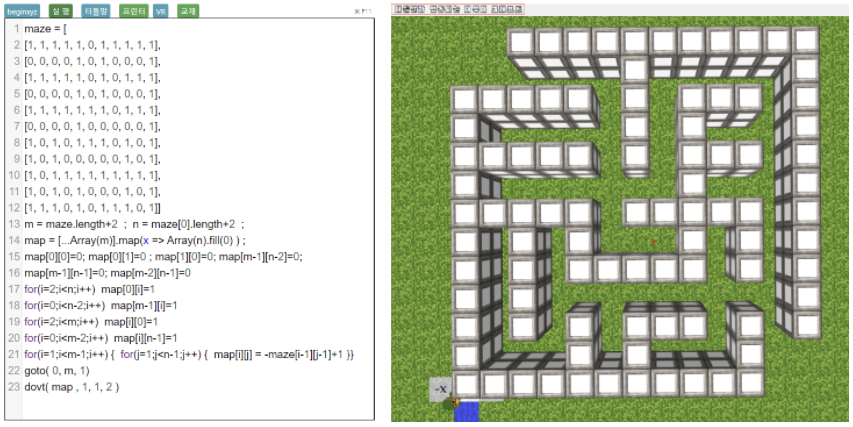






